<img align="center" src="figures/course.png" width="800">

#                                    16720 (B) Bag of Visual Words - Assignment 2

     Instructor: Kris Kitani                       TAs:Paritosh (Lead), Rawal, Yan, Zen, Wen-Hsuan, Qichen

## Theory Questions

This section should include the visualizations and answers to specifically highlighted questions from P1 to P4. This section will be manually Graded 

#### Q1.1.1 (5 Points WriteUp)
What visual properties do each of the filter functions (See Figure below) pick up? You should group the filters into categories by its purpose/functionality. Also, why do we need multiple scales of filter responses? **Answer in the writeup. Answer in your write-up.**

<img align="center" src="figures/filters_image.png" width="500">
<figcaption align="center"><b>Figure1. The provided multi-scale filter bank</b></figcaption>

We have four types of filters here:

1. The gaussian filters (which look like blue circles along the top row). These can be interpreted as taking a (weighted) average over the local area (larger areas as the scale gets larger).
2. The difference of gaussian (approximately laplacian) filters, which look like the red circles in the second row. These can be interpreted as taking a smoothed double derivative, which in a 2D case amounts to something like a blob filter. The laplacian reacts strongly when centered on a blob of the appropriate size.
3. The smoothed X derivative filters (third row) react strongly when the values change significantly along the horizontal axis. The larger the scale is the more area of the horizontal axis we're considering.
4. The smoothed Y derivative filters (fourth row) react strongly when the values change significantly along the vertical axis. They have the same scale behavior as the X axis filters.

We need multiple scales so that we can detect different types of features at different characteristic scales. For example, as we saw with sunflower images, different sized flowers will react differently to the laplacian blob filter depending on whether the filter scale matches the flower size. A small x-axis filter will be able to detect fine-scale gradients in a small area, and that is complemented well by a large x-axis filter that detects average gradient over a larger area, which wouldn't show up in a smaller filter if the gradient wasn't smooth.

If we were categorizing filters by their purpose, I would say
* Category 1 - gaussian, average value (roughly)
* Category 2 - laplacian, blob filter
* Category 3 - derivative (along both x and y), gradients

### Q1.3.1 (5 Points WriteUp)

Visualize three wordmaps of images from any one of the category. **Include these in your write-up, along with the original RGB images. Include some comments on these visualizations: do the “word” boundaries make sense to you?**. We have provided helper function to save and visualize the resulting wordmap in the util.py file. They should look similar to the ones in Figure 2.

<img align="center" src="./figures/textons.jpg" width="800">
<figcaption align = "center"><b>Figure 2. Visual words over images. You will use the spatially un-ordered distribution of visual words in a region (a bag of visual words) as a feature for scene classification, with some coarse information provided by spatial pyramid matching [2]</b></figcaption>

All images in the "aquarium" set. The word boundaries make sense to me, I'll discuss a few features of each image.

Image 1:
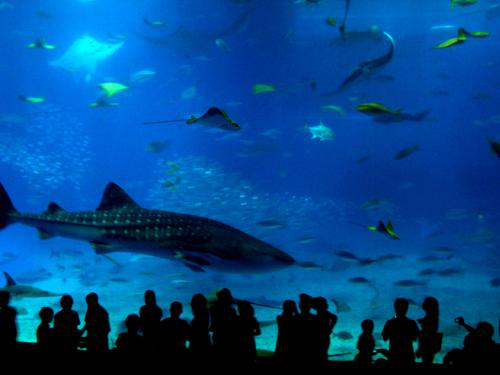

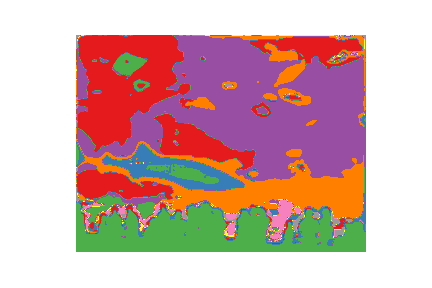
Here you can see some of the words that make sense. The large fish stands out with the blue/green words, and the people at the bottom also stand out as a single word.

Image 2:
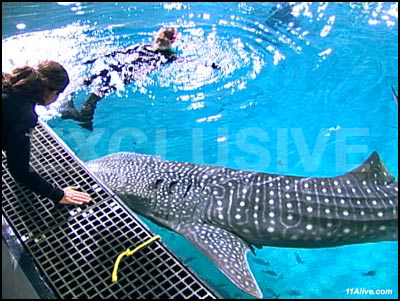

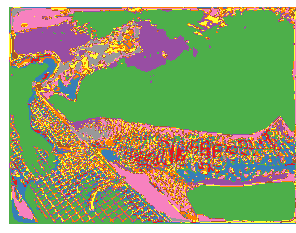

Here you can see a nice visualization of how the visual words are broken up by the strong linear patterns on both the side of the pool and the back of the fish (whale shark?). In addition, most of the blue water gets mapped to the same word.

Image 3
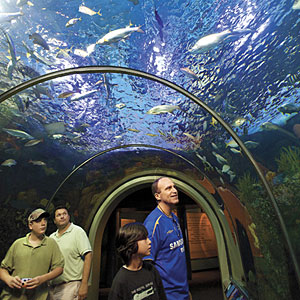

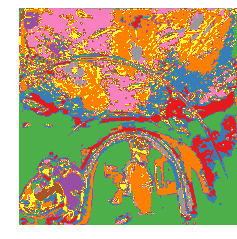

This one is a bit visually noisy above the people (flickering light amongst the fish) and that is represented as very noisy words in the upper half of the image. In addition, you can clearly see the semi-circular struts holding up the glass in the visual words.

### Q2.1
**For 5 Images, include their visual word maps and histograms**

Visual words for Image 1
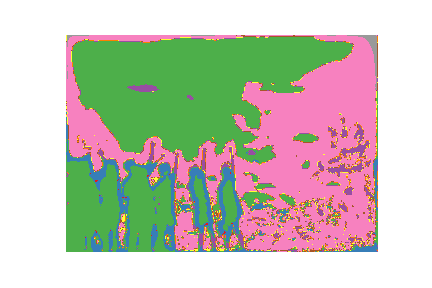

Histograms for Image 1
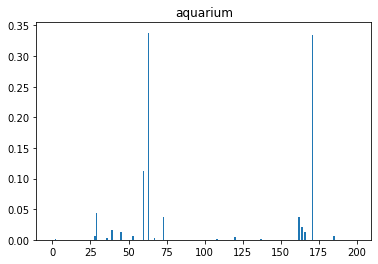

Visual words for Image 2
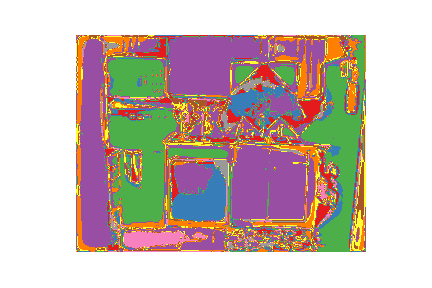

Histograms for Image 2
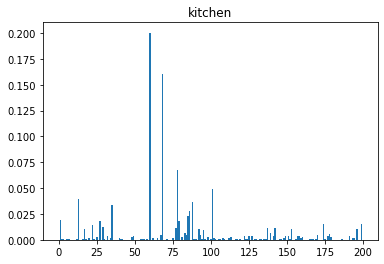

Visual words for Image 3
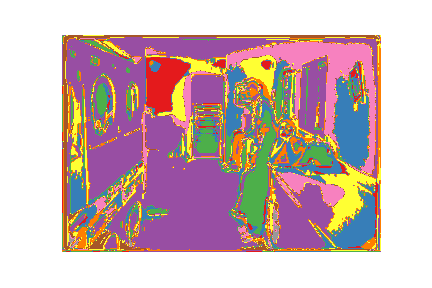

Histograms for Image 3
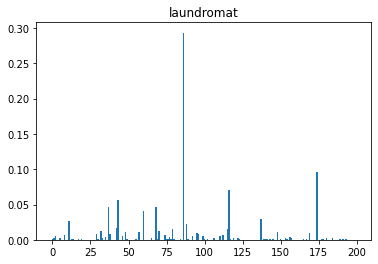

Visual words for Image 4
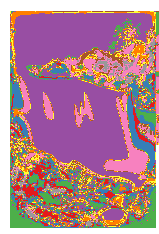

Histogram for Image 4
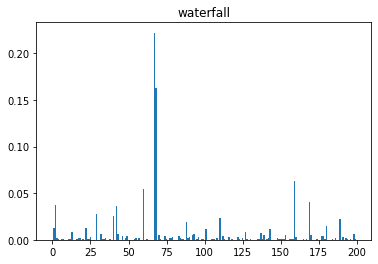

Visual words for Image 5
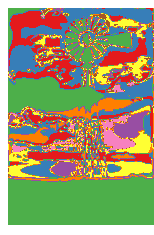

Histograms for Image 5
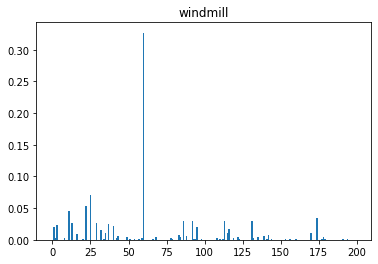

### Q3.1.1 
Submit the visualization of Confusion Matrix and the Accuracy value

Here was the confusion matrix that I got for section 3.1.1 using the default settings. Along axis 0 we have the actual labels, and along axis 1 we have the predicted labels. You can see that (actual:3, predicted:7) is one common overlap, and (actual:5, predicted: 4) is also fairly common.
```
(array([[14,  0,  0,  0,  0,  0,  0,  0],
        [ 1, 14,  0,  1,  0,  1,  1,  0],
        [ 0,  0, 15,  2,  4,  1,  0,  3],
        [ 1,  2,  1, 14,  0,  1,  0,  7],
        [ 2,  2,  1,  0,  8,  0,  0,  0],
        [ 1,  2,  1,  0,  7, 13,  0,  0],
        [ 1,  5,  1,  0,  1,  1, 10,  2],
        [ 2,  0,  0,  4,  1,  1,  0, 11]]),
```
Accuracy = 0.61875
This was for the default values.
* Default filters
* Alpha = 150
* Number of clusters (visual words) = 200
* SPM_layer_num = 3

#### Q3.1.2 (5 points WriteUp):

As there are some classes/samples that are more difficult to classify than the rest using the bags-of-words approach, they are more easily classified incorrectly into other categories. **List some of these classes/samples and discuss why they are more difficult.**

As discussed above, we have a few larger errors:
* (actual:3, predicted:7) was a the biggest mis-classification, which was (actual: highway, predicted: windmill). These both include roadside images.
* (actual:5, predicted:4) was another large mis-classification, which was (actual: laundromat, predicted: kitchen). These are both indoor scenes.
* (actual:2, predicted: 4) was another mis-classification, which was (actual: desert, predicted: kitchen). This one surprised me a bit. Maybe the color palletes are similar?

### Q3.1.3 [Extra Credit](10 points) Manually Graded:

Now that you have seen how well your recognition system can perform on a set of real images, you can experiment with different ways of improving this baseline system. 

Include the changes, modification you made and the impact it had on accuracy.

Tune the system you build to reach around 65\% accuracy on the provided test set (``data/test_data.npz``). **In your writeup, document what you did to achieve such performance: (1) what you did, (2) what you expected would happen, and (3) what actually happened.** Also, include a file called ``custom.py/ipynb`` for running your code.

Here was the confusion matrix that I got for section 3.1.3. The accuracy got over 65% but not by a lot. The code can be found in custom.ipynb, and the dictionary/trained system can be found in custom_dictionary.npy, custom_trained_system.npz.

```
confusion matrix
[[14  0  0  0  0  0  0  0]
 [ 0 14  0  0  1  1  2  0]
 [ 0  0 16  4  2  0  1  2]
 [ 1  3  3 14  0  0  0  5]
 [ 2  1  1  0  9  0  0  0]
 [ 2  1  1  1  5 13  1  0]
 [ 2  3  0  0  1  1 12  2]
 [ 0  0  1  2  1  1  1 13]]
accuracy
0.65625
```

Here are the parameters used:
```
# No changes to filters
ALPHA = 150
N_CLUSTERS = 600  # Default is 200
SPM_LAYER_NUM = 3  # L is SPM_LAYER_NUM-1
```

### 1) What I did
I tried a grid-like search over the parameters. I couldn't think of a good change to the filters, so I focused on alpha, number of clusters, and SPM layer number.

### 2) What I thought would happen
The problem is that some similar images (parks and waterfalls, for example, or windmills and highways) are being mis-classified. I wanted to increase the discrimination between these classes, so basically add information that would indicate differences in the classes that aren't available in the default settings. I thought either adding more words (greater n_clusters) or adding more points of interest (greater alpha) would increase the discrimination.

### 3) What actually happened
The largest response seemed to come from increasing the number of clusters. Interestingly, increasing alpha didn't have a large response, possibly because the added corners get "more of the same" information and don't add any discriminatory information. Increasing the number of clusters can be thought of as "increasing the number of words". My interpretation of this is that increasing the number of words allows the words related to "waterfall" and the words related to "park" to now be a little different and not overlap as much.

Interestingly, I didn't really get anything great by altering the SPM information, it appears that you don't get a lot of discrimination from increased spatial pyramid depth in these images.

### Q3.1.4 [Extra Credit](10 points):
**Inverse Document Frequency:** With the bag-of-word model, image recognition is similar to classifying a document with words. In document classification, inverse document frequency (IDF) factor is incorporated which diminishes the weight of terms that occur very frequently in the document set. For example, because the term "the" is so common, this will tend to incorrectly emphasize documents which happen to use the word "the" more frequently, without giving enough weight to the more meaningful terms.

In the homework, the histogram we computed only considers the term frequency (TF), i.e.  the number of times that word occurs in the word map.  Now we want to weight the word by its inverse document frequency.  The IDF of a word is defined as:

\begin{align*} IDF_w &= log \frac{T}{|\{d: w \in
d\}|}\\ \end{align*}

Here, $T$ is number of all training images, and $|\{d:w\in d\}|$ is the number of images $d$ such that $w$ occurs in that image.

**In your writeup: How does Inverse Document Frequency affect the performance? Better or worse? Explain your reasoning?**

YOUR ANSWER HERE

### Q4.2.1 
**Report the confusion matrix and accuracy for your results in your write-up. Can you comment in your writeup on whether the results are better or worse than classical BoW - why do you think that is?**

Here was the confusion matrix that I got for section 4.2.1 using the default settings. Along axis 0 we have the actual labels, and along axis 1 we have the predicted labels. You can see that there is very little misclassification.
```
[[13  0  0  0  0  0  1  0]
 [ 0 17  0  0  0  0  0  1]
 [ 0  0 23  1  0  0  0  1]
 [ 0  0  0 26  0  0  0  0]
 [ 0  0  0  0 13  0  0  0]
 [ 0  0  0  0  1 23  0  0]
 [ 0  1  0  0  0  0 20  0]
 [ 0  1  0  0  0  0  0 18]]
```
Accuracy = 0.95625
This was for the default values. Some of the misclassified ones:
* (actual: 2, predicted: 3) : (actual: desert, predicted: highway) - seems reasonable, both outside
* (actual: 6, predicted: 1) : (actual: waterfall, predicted: park) - seems reasonable, both outside and green
* (actual: 1, predicted: 7) : (actual: park, predicted: windmill) - this one is a little odd, maybe it was a park with a road through it, or a more dry park that changed the color palette?

In any case, the results are much better than the classical BoW. The accuracy jumped from ~60% to ~95%, which is impressive. I can think of two general reasons for why the deep features are better.
1. The deep features must be learning more effective features. Our chosen filter bank for BoW is made up of gaussians, laplacians, and derivative filters, which are arbitrarily chosen. As part of the learning process VGG is likely choosing more nuanced and effective filters. Maybe they aren't symmetric, for example, based on what proved effective in practice.
2. I'll bet the deep features are also learning more spatially effective methods than SPM. The SPM divisions always seemed somewhat arbitrary, in VGG the weights can be learned to emphasize or de-emphasize different parts of the image at different scales. The most discriminatory division should be learned.

### References

[1]  James Hays and Alexei A Efros. Scene completion using millions of photographs.ACM Transactions onGraphics (SIGGRAPH 2007), 26(3), 2007.

[2]  S. Lazebnik, C. Schmid, and J. Ponce. Beyond bags of features: Spatial pyramid matching for recogniz-ing natural scene categories.  InComputer Vision and Pattern Recognition (CVPR), 2006 IEEE Conferenceon, volume 2, pages 2169–2178, 2006.

[3]  Jian xiong Xiao, J. Hays, K. Ehinger, A. Oliva, and A. Torralba. Sun database: Large-scale scene recogni-tion from abbey to zoo.2010 IEEE Computer Society Conference on Computer Vision and Pattern Recognition,pages 3485–3492, 2010.14